### Import

In [90]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

import sys
sys.path.append('../scripts')

from preprocessing import clear_missing_data, delete_columnns_treshold, non_useful_columns, clear_missing_line, get_numerical, get_categorical, removal_of_duplicates
from pretraitement import imputation_of_categorical_val, imputation_of_numerical_val, onehotencoder
from training import determine_clusters, train_kmeans,predict_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Collecte de données

### Chargement du dataset

In [91]:
# Je charge le dataset en ne prenant que les 100 premières lignes afin de tester les fonctions
path = "../data/dataset_50000.csv" # Chemin du dataset 
df = pd.read_csv(path, nrows=50000, sep=',',encoding="utf-8")

C:\Users\Rimec\AppData\Local\Temp\ipykernel_10496\1599179622.py:3: DtypeWarning: Columns (12,18,34,36,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, nrows=50000, sep=',',encoding="utf-8")


In [92]:
df.shape

(50000, 207)

### Préparation des données

##### Nettoyage des colonnes

In [93]:
# Suppressions des colonnes avec 100% données manquantes
df = clear_missing_data(df)

Nombre de colonnes vides (100% de valeurs manquantes) : 44


In [94]:
# Suppressions des colonnes avec 70% données manquantes
df = delete_columnns_treshold(df)

Les colonnes supprimées sont : Index(['acidity_100g', 'carbon-footprint_100g', 'behenic-acid_100g',
       'erythritol_100g', 'chlorophyl_100g', 'ph_100g', 'nitrate_100g',
       'sulphate_100g', 'beta-carotene_100g', 'arachidonic-acid_100g',
       'chloride_100g', 'arachidic-acid_100g', 'alpha-linolenic-acid_100g',
       'fruits-vegetables-nuts-dried_100g', 'abbreviated_product_name',
       'fruits-vegetables-nuts_100g', 'chromium_100g', 'molybdenum_100g',
       'cocoa_100g', 'biotin_100g', 'carbon-footprint-from-meat-or-fish_100g',
       'fruits-vegetables-nuts-estimate_100g', 'energy-from-fat_100g',
       'fluoride_100g', 'packaging_text', 'insoluble-fiber_100g',
       'starch_100g', 'maltose_100g', 'lactose_100g', 'fructose_100g',
       'glucose_100g', 'sucrose_100g', 'iodine_100g', 'phylloquinone_100g',
       'first_packaging_code_geo', 'polyols_100g', 'cities_tags',
       'omega-6-fat_100g', 'omega-3-fat_100g', 'caffeine_100g',
       'soluble-fiber_100g', 'vitamin-k_10

In [95]:
# Suppressions des colonnes non pertinentes
df = non_useful_columns(df)



Les colonnes supprimées sont : ['Unnamed: 0', 'url', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'last_modified_by', 'last_updated_t', 'brands_tags', 'last_updated_datetime', 'countries_tags', 'countries_en', 'states_tags', 'states_en', 'image_url', 'image_small_url', 'image_nutrition_url', 'image_nutrition_small_url']


##### Nettoyage des lignes

In [96]:
# Suppressions des lignes vides

df = clear_missing_line(df)

Nombre de lignes vides (100% de valeurs manquantes) : 0


#### Supression des doublons

In [97]:
# Netoyage des doublons
df = removal_of_duplicates(df)

### Imputation des données

In [98]:
df_num = df.select_dtypes(include=['number'])  # Garder uniquement les colonnes numériques
df_cat = df.select_dtypes(exclude=['number'])  # Garder uniquement les colonnes catégorielles



In [ ]:
# Imputation des valeurs manquantes pour les colonnes numériques
df_num = imputation_of_numerical_val(df_num) 

KeyboardInterrupt: 

In [ ]:
# Imputation des valeurs manquantes pour les colonnes catégorielles
df_cat = imputation_of_categorical_val(df_cat)

In [ ]:
# Assurer que df_num et df_cat ont les mêmes index que df
df[df_num.columns] = df_num
df[df_cat.columns] = df_cat


In [ ]:
df

,code,creator,product_name,quantity,brands,categories,categories_tags,categories_en,labels,labels_tags,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,54,kiliweb,Limonade artisanale a la rose,1pcs,Spartan,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,254.468,1064.4,8.432000,1.170000,17.714000,5.980000,5.848000,27.790000,0.911000,0.364400
1,63,kiliweb,Mozzarella Schnittfest Gerieben 45% Fett,1pcs,Gut & Gunstig,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,332.000,1389.0,25.000000,17.300000,3.000000,1.000000,5.817167,23.000000,1.200000,0.480000
2,114,kiliweb,Chocolate n 3,80 g,Jeff de Bruges,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","Point Vert, Fabriqué en France","en:green-dot,en:made-in-france",...,581.600,2415.0,44.000000,28.000000,30.000000,27.000000,10.292500,7.100000,0.025000,0.010000
3,1,inf,Poulet fermier,300g,nortembio,Tè verde,"en:beverages-and-beverages-preparations,en:pla...","Beverages and beverages preparations,Plant-bas...","No gluten, Organic, Vegetarian, EU Organic, Ko...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...",...,262.668,1098.8,5.952000,1.170000,13.914000,5.980000,5.848000,39.470000,0.911000,0.364400
4,105,kiliweb,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,"Bebidas y preparaciones de bebidas, Bebidas","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,316.800,1325.4,5.752000,1.312500,14.918000,3.500000,19.488000,39.586000,0.860400,0.344200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15608,openfoodfacts-contributors,IsaLean Shake,1pcs,Gerber,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,215.400,901.2,15.961905,1.620952,22.200606,5.620952,4.845281,32.279394,1.087134,0.434854
9996,15609,foodvisor,Thé vert Matcha Japonais Bio,1pcs,NaturaleBio,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,374.000,1565.0,5.300000,0.300000,40.000000,8.000000,9.407407,30.000000,0.787531,0.315012
9997,15611,kiliweb,Avena crunchy,1pcs,Hacendado,"Alimentos y bebidas de origen vegetal, Aliment...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",en:high-fibres,"en:source-of-fibre,en:high-fibres",...,390.000,1632.0,5.800000,1.000000,66.000000,4.600000,11.000000,13.000000,0.200000,0.080000
9998,1561477671,kiliweb,Valériane stress someil,1pcs,Spartan,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,213.600,893.4,10.026000,3.720000,21.656000,7.596000,4.862000,7.382000,2.336500,0.934800


### Pretraitement

In [ ]:
df = onehotencoder(df)

### Entrainement 

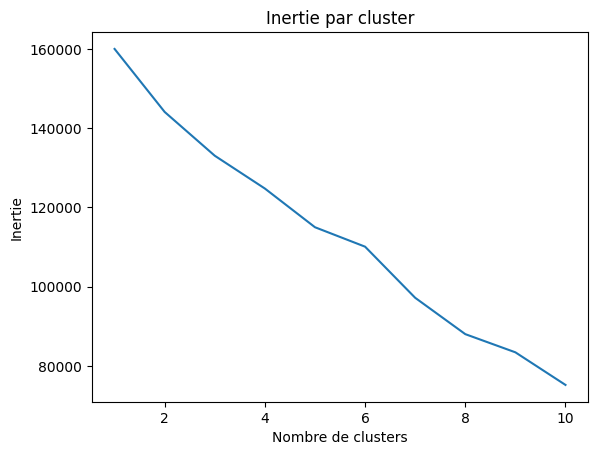

<module 'matplotlib.pyplot' from 'd:\\Logiciel\\conda\\envs\\clustering_OFF\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [ ]:
# Normalisation des données (important pour K-Means)
from sklearn.discriminant_analysis import StandardScaler



# Normaliser les colonnes numériques uniquement
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Réassembler les données (optionnel : si besoin de garder les catégories)
df_scaled = pd.concat([df_num_scaled, df_cat], axis=1)

# Étape 1 : Trouver le bon nombre de clusters
determine_clusters(df_num_scaled)



In [ ]:
# Étape 2 : Entraîner le modèle avec un nombre de clusters optimal (ex: 4)
model = train_kmeans(df_num, nb_clusters=6)

In [ ]:
predictions = predict_data(model, df_num)



In [ ]:
import pandas as pd

# Ajouter les prédictions au DataFrame
df_num['Cluster'] = predictions

# Afficher les premières lignes du DataFrame avec les clusters
print(df_num.head())


   code  serving_quantity  product_quantity  unique_scans_n  completeness  \
0    54             126.2             296.0             1.4        0.1625   
1    63              42.2             296.0             1.0        0.4625   
2   114              41.6              80.0             1.0        0.4750   
3     1             126.2             300.0             1.0        0.8875   
4   105               5.0             750.0             1.0        0.6750   

   last_image_t  energy-kcal_100g  energy_100g  fat_100g  saturated-fat_100g  \
0  1.733085e+09           254.468       1064.4     8.432              1.1700   
1  1.739903e+09           332.000       1389.0    25.000             17.3000   
2  1.737248e+09           581.600       2415.0    44.000             28.0000   
3  1.741987e+09           262.668       1098.8     5.952              1.1700   
4  1.738074e+09           316.800       1325.4     5.752              1.3125   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins

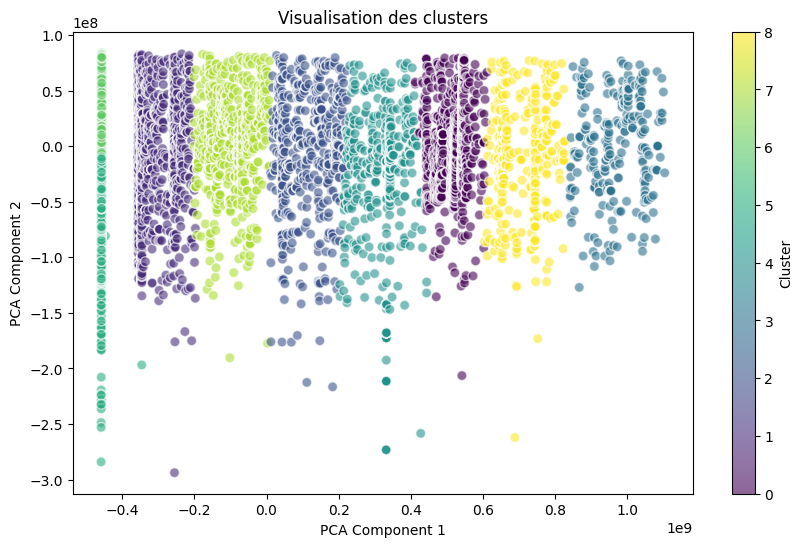

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduire les dimensions à 2 pour la visualisation
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_num.drop(columns=['Cluster']))

# Visualiser les clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisation des clusters')
plt.colorbar(label='Cluster')
plt.show()


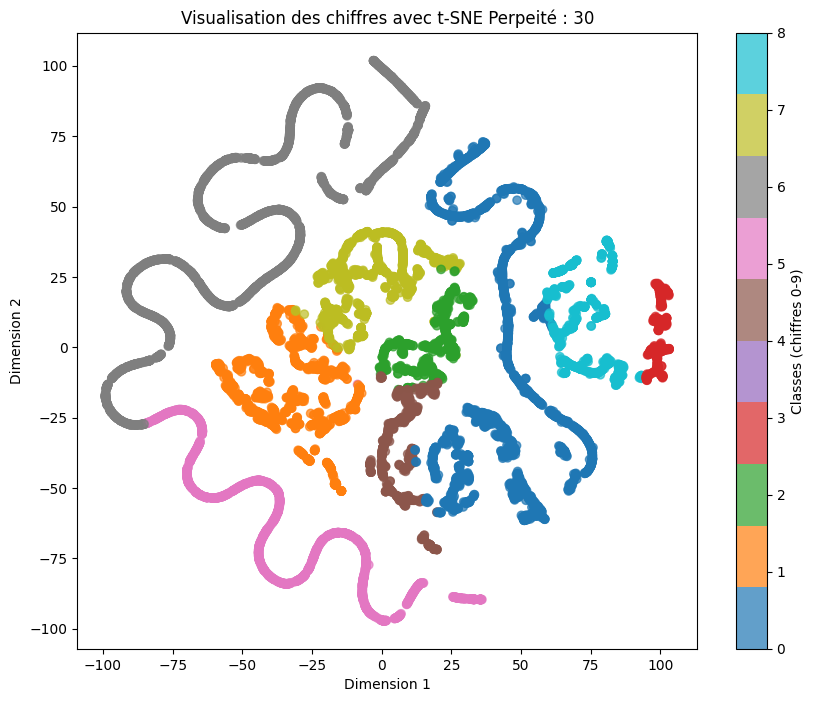

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# Réduction à 2 dimensions ici, mais vous pouvez choisir un autre nombre si nécessaire
pca = PCA(n_components=2)  
df_pca = pca.fit_transform(df_num.drop(columns=['Cluster']))

# Application de t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df_pca)

# Visualisation des résultats
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predictions, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Classes (chiffres 0-9)")
plt.title("Visualisation des chiffres avec t-SNE Perpeité : 30")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
#

In [ ]:
# Taille des clusters
cluster_sizes = df_num['Cluster'].value_counts()
print("Taille des clusters :")
print(cluster_sizes)

# Statistiques descriptives par cluster
cluster_stats = df_num.groupby('Cluster').mean()
print("Statistiques descriptives par cluster :")
print(cluster_stats)


Taille des clusters :
Cluster
6    2263
0    2147
5    1324
1    1236
7     950
8     657
2     589
4     548
3     286
Name: count, dtype: int64
Statistiques descriptives par cluster :
                 code  serving_quantity  product_quantity  unique_scans_n  \
Cluster                                                                     
0        9.857563e+08         88.438522        432.174488        1.194783   
1        1.479462e+08        139.504876        415.518720        1.509871   
2        5.716894e+08         84.712623        336.903109        1.229881   
3        1.428478e+09        128.412168        276.573946        1.206294   
4        7.777446e+08         88.714638        257.975350        1.110584   
5        1.000666e+05        128.904806        474.242957        1.388369   
6        4.563590e+03        133.862784        448.771545        1.457446   
7        3.633588e+08         93.826168        384.898586        1.269053   
8        1.152508e+09        142.408129     

In [ ]:
from visualize import word_cloud_for_cluster


word_cloud_for_cluster(df_cat, cluster_number=3, predictions=predictions) 
# Afficher le nuage de mots pour le cluster 

Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_creator.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_product_name.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_quantity.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_brands.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_categories.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_categories_tags.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_categories_en.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_labels.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_labels_tags.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_labels_en.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_countries.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_serving_size.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_3_nutriscore_grade.png
Image sa